In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/feature_descriptions.csv')

In [3]:
# Convert the component string in the csv that is e.g. "Node(component_name=z, layer...)" to the form "(z, 9, 9)"
def node_to_tuple(row):
    node = row['node']
    component = node.split('component_name=')[1].split(',')[0]
    layer = node.split('layer=')[1].split(',')[0]
    head = node.split('head=')[1].split(',')[0]
    row['component'] = f'({component}, {layer}, {head})'
    return row
df = df.apply(node_to_tuple, axis=1)
df

,component,feature_id,node,feature_id.1,feature_type,topk,names,recall,precision,f_score,component.1,recall_test,precision_test,f_score_test
0,"(z, 9, 9)",0.0,"Node(component_name=z, layer=9, head=9, seq_po...",0.0,dead,0.0,NaN,0.0,0.0,0.0,"Node(component_name=z, layer=9, head=9, seq_po...",NaN,NaN,NaN
1,"(z, 9, 9)",1.0,"Node(component_name=z, layer=9, head=9, seq_po...",1.0,dead,0.0,NaN,0.0,0.0,0.0,"Node(component_name=z, layer=9, head=9, seq_po...",NaN,NaN,NaN
2,"(z, 9, 9)",2.0,"Node(component_name=z, layer=9, head=9, seq_po...",2.0,dead,0.0,NaN,0.0,0.0,0.0,"Node(component_name=z, layer=9, head=9, seq_po...",NaN,NaN,NaN
3,"(z, 9, 9)",3.0,"Node(component_name=z, layer=9, head=9, seq_po...",3.0,dead,0.0,NaN,0.0,0.0,0.0,"Node(component_name=z, layer=9, head=9, seq_po...",NaN,NaN,NaN
4,"(z, 9, 9)",4.0,"Node(component_name=z, layer=9, head=9, seq_po...",4.0,dead,0.0,NaN,0.0,0.0,0.0,"Node(component_name=z, layer=9, head=9, seq_po...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417787,"(k, 10, 1)",8187.0,"Node(component_name=k, layer=10, head=1, seq_p...",8187.0,current_name,1.0,['Sebastian'],0.0,0.0,0.0,"Node(component_name=k, layer=10, head=1, seq_p...",0.0,NaN,NaN
417788,"(k, 10, 1)",8188.0,"Node(component_name=k, layer=10, head=1, seq_p...",8188.0,current_name,1.0,['Sebastian'],0.0,0.0,0.0,"Node(component_name=k, layer=10, head=1, seq_p...",0.0,NaN,NaN
417789,"(k, 10, 1)",8189.0,"Node(component_name=k, layer=10, head=1, seq_p...",8189.0,current_name,1.0,['Sebastian'],0.0,0.0,0.0,"Node(component_name=k, layer=10, head=1, seq_p...",0.0,NaN,NaN
417790,"(k, 10, 1)",8190.0,"Node(component_name=k, layer=10, head=1, seq_p...",8190.0,current_name,1.0,['Sebastian'],0.0,0.0,0.0,"Node(component_name=k, layer=10, head=1, seq_p...",0.0,NaN,NaN


In [4]:
heads_order = {
    'Duplicate Token\nOutputs': ['(z, 0, 1)', '(z, 0, 10)', '(z, 3, 0)'],
    'Induction\nOutputs': ['(z, 5, 5)', '(z, 6, 9)', '(z, 5, 8)', '(z, 5, 9)'],
    'S-Inhibition\nOutputs': ['(z, 7, 3)', '(z, 7, 9)', '(z, 8, 6)', '(z, 8, 10)'],
    'S-Inhibition\nValues': ['(v, 7, 3)', '(v, 7, 9)', '(v, 8, 6)', '(v, 8, 10)'],
    'Name Mover\nQueries': ['(q, 9, 9)', '(q, 9, 6)', '(q, 10, 0)'],
    'Name Mover\nKeys': ['(k, 9, 9)', '(k, 9, 6)', '(k, 10, 0)'],
    'Name Mover\nValues': ['(v, 9, 9)', '(v, 9, 6)', '(v, 10, 0)'],
    'Name Mover\nOutputs': ['(z, 9, 9)', '(z, 9, 6)', '(z, 10, 0)'],
}
plain_order = ['(z, 0, 1)', '(z, 0, 10)', '(z, 3, 0)', '(z, 5, 5)', '(z, 6, 9)', 
               '(z, 5, 8)', '(z, 5, 9)', '(z, 7, 3)', '(z, 7, 9)', '(z, 8, 6)', 
               '(z, 8, 10)', '(v, 7, 3)', '(v, 7, 9)', '(v, 8, 6)', '(v, 8, 10)', 
               '(q, 9, 9)', '(q, 9, 6)', '(q, 10, 0)', '(k, 9, 9)', '(k, 9, 6)', 
               '(k, 10, 0)', 
                '(v, 9, 9)', '(v, 9, 6)', '(v, 10, 0)',
               '(z, 9, 9)', '(z, 9, 6)', '(z, 10, 0)']

sorted_labels = [
    'io_position_BAB', 'io_position_ABB',
    's_name', 'first_name_S', 'second_name_S',
    'io_name', 'first_name_IO', 'second_name_IO',
    's_is_male', 's_is_female',
    'io_is_male', 'io_is_female',
    'contains_name',
    'first_name', 'second_name',
    'current_name', 'current_name_pos_1', 'current_name_pos_2',
    'context_pos_1', 'context_pos_2',
    'current_pos_is_gender_M', 'current_pos_is_gender_F'
]

In [5]:
color_dict = {
    'io_position_BAB': '#ff9999', 
    'io_position_ABB': '#ff6666',  

    's_name': '#9999ff',  
    'first_name_S': '#6666ff',  
    'second_name_S': '#3333ff', 

    'io_name': '#99ff99',  
    'first_name_IO': '#66ff66',
    'second_name_IO': '#33ff33',

    's_is_male': '#ffff99',  
    's_is_female': '#ffff66', 

    'io_is_male': '#ffcc99',  
    'io_is_female': '#ff9966',

    'contains_name': '#cc99ff',

    'first_name': '#99ccff',  
    'second_name': '#6699ff', 

    'current_name': '#d2b48c',
    'current_name_pos_1': '#a0522d',
    'current_name_pos_2': '#8b4513',


    'context_pos_1': '#cccccc',  
    'context_pos_2': '#999999',  

    'current_pos_is_gender_M': '#99ffff',
    'current_pos_is_gender_F': '#66ffff',
}

# META will refer to the small side bars throughout the notebook
meta_color_dict = {
    'not ioi': '#2B2B2B',
    'no good description found': '#7D3030',
    'interpreted': '#4CAF50',
}

descriptions_dict = {
    'io_position_BAB': 'IO is 2nd name',  
    'io_position_ABB': 'IO is 1st name', 

    's_name': 'S is <name>', 
    'first_name_S': 'S is <name> and at 1st position',  
    'second_name_S': 'S is <name> and at 2nd position',  

    'io_name': 'IO is <name>',  
    'first_name_IO': 'IO is <name> and at 1st position', 
    'second_name_IO': 'IO is <name> and at 2nd position', 

    's_is_male': 'S is male',  
    's_is_female': 'S is female', 

    'io_is_male': 'IO is male',  
    'io_is_female': 'IO is female',  
    'contains_name': '<name> is in sentence',  

    'first_name': '<name> is at 1st position',  
    'second_name': '<name> is at 2nd position',  

    'current_name': 'current token is <name>', 
    'current_name_pos_1': 'token is <name> and at 1st position',  
    'current_name_pos_2': 'token is <name> and at 2nd position',  


    'context_pos_1': 'current token is at 1st position',  
    'context_pos_2': 'current token is at 2nd position',  

    'current_pos_is_gender_M': 'current token is male', 
    'current_pos_is_gender_F': 'current token is female', 
}

meta_descriptions_dict = {
    'not_ioi': 'Doesn\'t activate on IOI',
    'no good description found': 'No good description found',
    'interpreted': 'Interpreted',
}
ios1_feature_types = [
    'current_name', 'current_name_pos_1', 'current_name_pos_2', 'context_pos_1', 'context_pos_2', 'current_pos_is_gender_M', 'current_pos_is_gender_F']
gender_feature_types = [
    's_is_male', 's_is_female', 'io_is_male', 'io_is_female', 'current_pos_is_gender_M', 'current_pos_is_gender_F', 'contains_name'
]


In [6]:
threshold = 0.5
gender_threshold = 0.8

df.loc[(~df.feature_type.isin(['dead', 'not_ioi'])) & (df.f_score_test < threshold), 'feature_type'] = 'no good description found'
# apply gender threshold to gender features
df.loc[(df.feature_type.isin(gender_feature_types)) & (df.f_score_test < gender_threshold), 'feature_type'] = 'no good description found'
# no desciption found where f score is nan
df.loc[df.f_score_test.isna() & (~df.feature_type.isin(['dead', 'not_ioi'])), 'feature_type'] = 'no good description found'
clean_df = df.loc[~df.feature_type.isin(['dead', 'not_ioi', 'no good description found'])].copy()
agg = clean_df.groupby(['component', 'feature_type']).node.count().reset_index().rename(columns={'node': 'count'})

# remove the SI-V features that we didn't wanna look at
agg.loc[(agg.feature_type.isin(ios1_feature_types)) & agg.component.isin(['(v, 7, 3)', '(v, 7, 9)', '(v, 8, 6)', '(v, 8, 10)']), 'count'] = 0

# normalize
agg['normalized count'] = agg.groupby('component', sort=False)['count'].apply(lambda df: df / df.sum()).values

In [7]:
meta_df = df.copy()
meta_df.loc[(~meta_df.feature_type.isin(['dead', 'not_ioi', 'no good description found'])), 'feature_type'] = 'interpreted'
meta_df = meta_df[meta_df.feature_type.isin(['not_ioi', 'no good description found', 'interpreted'])].copy()
agg_meta = meta_df.groupby(['component', 'feature_type']).node.count().reset_index().rename(columns={'node': 'count'})
agg_meta['normalized count'] = agg_meta.groupby('component', sort=False)['count'].apply(lambda df: df / df.sum()).values
agg_meta

,component,feature_type,count,normalized count
0,"(k, 10, 0)",interpreted,203,0.024780
1,"(k, 10, 0)",no good description found,7989,0.975220
2,"(k, 10, 1)",interpreted,1156,0.141113
3,"(k, 10, 1)",no good description found,7036,0.858887
4,"(k, 10, 10)",interpreted,111,0.013550
...,...,...,...,...
123,"(z, 9, 7)",no good description found,153,0.146132
124,"(z, 9, 7)",not_ioi,612,0.584527
125,"(z, 9, 9)",interpreted,885,0.549007
126,"(z, 9, 9)",no good description found,161,0.099876


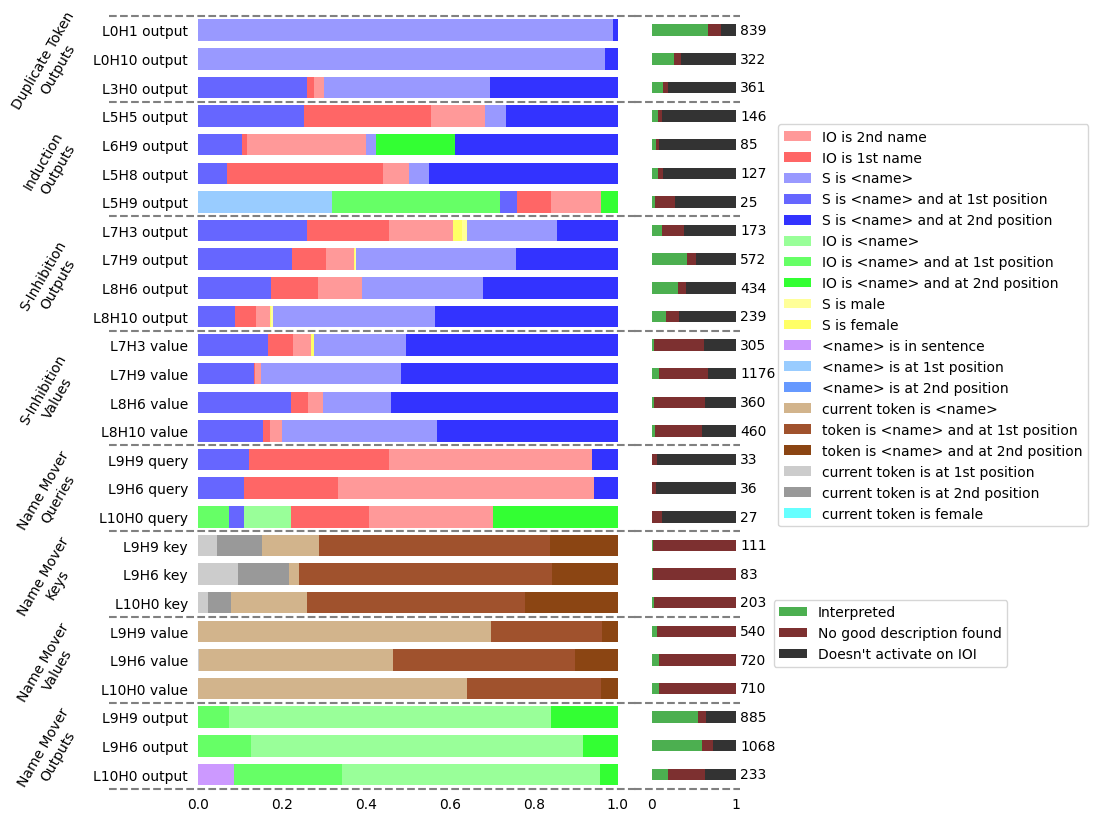

In [8]:
# the best plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 10), sharey=True, gridspec_kw={'width_ratios': [5, 1]})
fig.subplots_adjust(wspace=0.05) 

piv = agg.pivot(index='component', columns='feature_type', values='normalized count').fillna(0)
piv = piv.loc[plain_order]
piv = piv.iloc[::-1]
barh = piv.plot(kind='barh', stacked=True, color=[color_dict.get(x, '#333333') for x in piv.columns], width=0.75, ax=ax1)

total_length = len(piv)

# Adding text at ax1
y_pos = total_length
for category, values in heads_order.items():  
    cat_length = len(values)
    y_pos -= cat_length
    middle_of_category = y_pos + cat_length / 2 - .7
    ax1.text(-0.35, middle_of_category, category, va='center', ha='center', rotation=60, fontsize=10, color='black')

# Adding dashed lines at both ax1 and ax2
y_pos = total_length
for category, values in heads_order.items():
    y_pos -= len(values)
    ax1.axhline(y=y_pos - 0.5, color='grey', linestyle='--', xmin=-0.2, clip_on=False)
    ax2.axhline(y=y_pos - 0.5, color='grey', linestyle='--', xmin=-0.2, clip_on=False)
# last line on the top
ax1.axhline(y=total_length - 0.5, color='grey', linestyle='--', xmin=-0.2, clip_on=False)
ax2.axhline(y=total_length - 0.5, color='grey', linestyle='--', xmin=-0.2, clip_on=False)

# Beautifying yticklabels for ax1
def beautify_yticklabels(label):
    component = label[1] 
    layer = label.split(',')[1].replace(' ', '')
    head = label.split(',')[2][:-1].replace(' ', '')
    if component == 'z':
        component_name = 'output'
    elif component == 'v':
        component_name = 'value'
    elif component == 'q':
        component_name = 'query'
    elif component == 'k':
        component_name = 'key'
    return f'L{layer}H{head} {component_name}'


# Legend adjustment for ax1
handles, labels = ax1.get_legend_handles_labels()
label_handle_map = dict(zip(labels, handles))
sorted_handles = [label_handle_map[label] for label in sorted_labels if label in label_handle_map]
ax1.legend(sorted_handles, [descriptions_dict[label] for label in sorted_labels if label in label_handle_map], loc='center left', bbox_to_anchor=(1.3, 0.6))
# remove ax1 y label
ax1.set_ylabel('')

# Despinning for both ax1 and ax2
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True)

# Plot the small bars on the right
piv_meta = agg_meta.pivot(index='component', columns='feature_type', values='normalized count').fillna(0)
piv_meta = piv_meta.loc[plain_order]
piv_meta = piv_meta.iloc[::-1]
barh_meta = piv_meta.plot(kind='barh', stacked=True, color=[meta_color_dict.get(x, '#333333') for x in piv_meta.columns], width=0.4, legend=True, ax=ax2)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, [meta_descriptions_dict[label] for label in labels], loc='center left', bbox_to_anchor=(1.3, 0.2))


ax1.set_yticklabels([beautify_yticklabels(label.get_text()) for label in ax1.get_yticklabels()])

# Filter agg_meta for rows where feature_type is "interpreted"
interpreted_counts = agg_meta[agg_meta['feature_type'] == 'interpreted'][['component', 'count']]

# Iterate through each bar in ax2 to label it with the count
for bar, component in zip(ax2.patches, piv_meta.index):
    # Find the count for this component
    count = interpreted_counts.loc[interpreted_counts['component'] == component, 'count'].values[0]
    # Place a text label right next to the bar
    ax2.text(ax2.get_xlim()[1],  # X position, a bit right of the bar end
             bar.get_y() + bar.get_height() / 2,  # Y position, at the center of the bar
             str(count),  # The text to display
             va='center')  # Vertically align the text in the center of the bar

plt.savefig('../figures/feature_descriptions.pdf', bbox_inches='tight')
plt.savefig('../figures/feature_descriptions.png', bbox_inches='tight')

In [9]:
agg.to_csv('../data/stacked_boxplot.csv')